In [1]:
import numpy as np

import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt


In [2]:
from astropy.io import fits
fits_image_filename = '../Data/fits/calexp-1-136326.fits'

hdu_list = fits.open(fits_image_filename)

In [3]:
hdu_list.info()

Filename: ../Data/fits/calexp-1-136326.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  COMPRESSED_IMAGE    1 PrimaryHDU     157   ()      
  1                1 CompImageHDU     86   (8176, 6132)   int32   
  2                1 CompImageHDU     92   (8176, 6132)   int32   
  3                1 CompImageHDU     86   (8176, 6132)   int32   
  4                1 BinTableHDU     40   35R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   4R x 2C   [64A, 1J]   
  6                1 BinTableHDU     40   2R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
  7                1 BinTableHDU     40   3R x 6C   [1J, 1J, 1J, 1J, 1J, 1D]   
  8                1 BinTableHDU     26   1R x 3C   [1J, 1D, 1D]   
  9                1 BinTableHDU     40   1R x 6C   [1J, 1J, 1J, 1J, 6J, 6J]   
 10                1 BinTableHDU     36   6R x 5C   [6D, 1D, 1D, 1D, 1D]   
 11                1 BinTableHDU     36   6R x 5C   [1J, 1J, 1J, 1J, 729D]   
 12                1 B

In [4]:
hdu_list[3].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 8176 / length of original image axis                  
NAXIS2  =                 6132 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
WCSAXES =                    2 / Number of WCS axes                             
CRPIX1  =          4085.970136 / Reference pixel on axis 1                      
CRPIX2  =          3079.529769 / Reference pixel on axis 2                      
CRVAL1  =     110.023098651493 / Value at ref. pixel on axis 1                  
CRVAL2  =     50.39703835954

In [5]:
image_data = fits.getdata(fits_image_filename,0)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(6132, 8176)


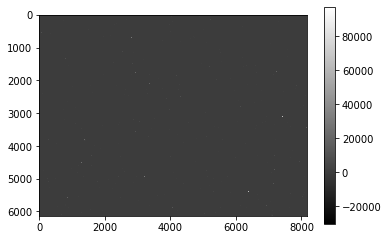

In [6]:
#plt.imshow(image_data, cmap='gray')
plt.imshow(image_data,cmap='gray')
plt.colorbar()

In [32]:
hdu_list[1]

In [33]:
print (image_data.shape)

(6132, 8176)


## Source Detection

In [34]:
from astropy.stats import sigma_clipped_stats
data = image_data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
print((mean, median, std))

(0.46058803872388027, -5.002220859751105e-12, 81.97306749175017)


In [35]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id  xcentroid ycentroid  sharpness  ... sky    peak      flux       mag     
---- --------- ---------- ---------- ... --- --------- --------- ------------
   1 689.82218  1.1750146  0.5376851 ...   0 892.23981 1.2710503  -0.26040688
   2  4229.904 0.86879459 0.49765127 ...   0  817.1916 1.8133932  -0.64622995
   3 4805.6141 0.84341696 0.49098808 ...   0 1400.8999 2.8483668   -1.1364898
   4 8171.3185  1.1672302 0.46461321 ...   0 19645.953 36.901645   -3.9176143
   5 4808.0406  2.1500437 0.74378391 ...   0 1100.7071 1.5485615  -0.47482115
   6 2345.6226  2.6357292 0.38964751 ...   0 600.38567 1.1241575  -0.12706794
   7 3502.5614  3.3669117 0.58888556 ...   0 792.17553 1.3733795  -0.34447641
   8 5533.1443  3.1934142 0.51119712 ...   0 10039.783  19.29229   -3.2134595
   9 6696.8678  2.6535396 0.46907773 ...   0 508.66008 1.0941221 -0.097664458
  10 6779.9109  2.3228491 0.46263081 ...   0 558.69222 1.3318132   -0.3111083
 ...       ...        ...        ... ... ...       ...       ...

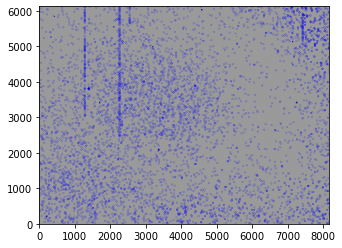

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [37]:
from photutils import IRAFStarFinder
IRASfind = IRAFStarFinder(fwhm=3.0, threshold=5.*std)  
sources = IRASfind(data - median)
for col in sources.colnames:
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id  xcentroid ycentroid    fwhm   ...    sky        peak      flux      mag    
---- --------- --------- --------- ... ---------- --------- --------- ----------
   1 689.91935 0.8811828 1.9963565 ...  391.22353 501.01628 2584.9938 -8.5311488
   2 7250.2684 1.0808081 1.9097081 ...  72.268645 327.98847 1926.2373 -8.2117745
   3 8171.6082 1.0894815 1.9503171 ...  3892.7784 15753.175 101513.82 -12.516313
   4 357.90429 2.6072607 1.6359716 ... -19.456943 244.60157 842.20767  -7.313548
   5 3502.3419 3.1531494 1.8881292 ...  163.29934 628.87619 3298.6467 -8.7958395
   6 6697.0081 2.7451613 1.8981576 ...  64.624846 444.03523 2584.9938 -8.5311488
   7 167.17576 6.0242424 1.5598905 ... -60.455501 218.89061 687.94191 -7.0938794
   8 658.01882 6.9849412 2.0518563 ...  556.60754 802.59889  4429.929 -9.1159919
   9 1513.9956 7.7542101 1.8441841 ...  82.692007 334.24248 1733.0577 -8.0970326
  10 7695.5844 10.728302 1.8566747 ...  2582.2143 9166.9997 49095.426 -11.727603
 ...       ...       ...    

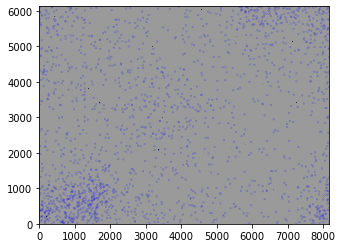

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [41]:
from astropy.stats import sigma_clipped_stats
from photutils import find_peaks
data = image_data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
threshold = median + (10. * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl)

x_peak y_peak peak_value
------ ------ ----------
  4227      0  1033.9975
   690      1  892.23981
  4805      1  1400.8999
  8172      1  19645.953
  5533      3  10039.783
  6823      3  883.90112
  8114      4  4669.6663
  7690      6  10907.006
   658      7  1359.2064
   692      7  825.53029
   ...    ...        ...
  3634   6123  833.86898
   212   6124  89849.383
  5830   6124  3669.0235
  1056   6125  6904.4352
  2107   6127  69211.125
  2482   6127  1500.9642
  2546   6128  3969.2163
  2262   6129  4311.1026
  7426   6129  6837.7256
  1280   6131  16118.687
  4209   6131  32721.019
Length = 8483 rows


(0, 6131)

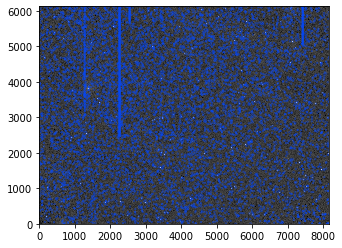

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=5.)
norm = simple_norm(data, 'sqrt', percent=99.9)
plt.imshow(data, cmap='Greys_r', origin='lower', norm=norm)
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, data.shape[1]-1)
plt.ylim(0, data.shape[0]-1)

## Image Segmentation

In [47]:
from photutils import detect_threshold
threshold = detect_threshold(data, nsigma=3.)
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
sigma = 10.0 * gaussian_fwhm_to_sigma  # FWHM = 10.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=5, filter_kernel=kernel)

Text(0.5, 1.0, 'Segmentation Image')

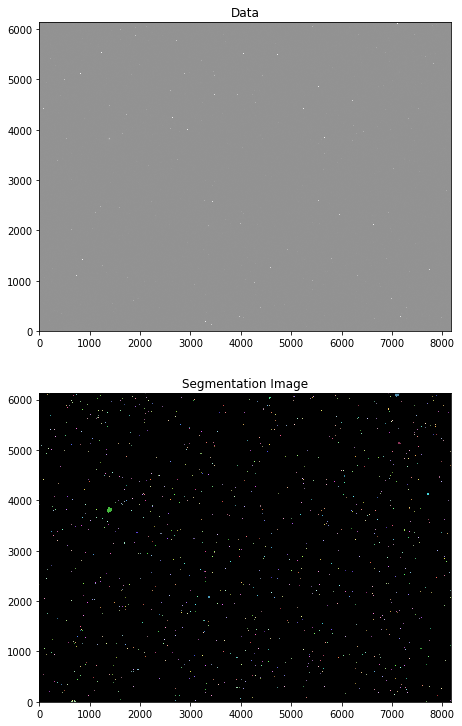

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
cmap = segm.make_cmap(random_state=12345)
ax2.imshow(segm, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')

In [49]:
from photutils import deblend_sources
#segm_deblend = deblend_sources(data, segm, npixels=5,filter_kernel=kernel, nlevels=32,contrast=0.001)
segm_deblend = segm

In [4]:
from astropy.convolution import Gaussian2DKernel
from photutils import Background2D, MedianBackground
from photutils import detect_threshold, detect_sources
data = image_data
bkg_estimator = MedianBackground()
bkg = Background2D(data, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
threshold = bkg.background + (10. * bkg.background_rms)

In [5]:
from astropy.stats import gaussian_fwhm_to_sigma
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
npixels = 5
segm = detect_sources(data, threshold, npixels=npixels,filter_kernel=kernel)
#segm_deblend = deblend_sources(data, segm, npixels=npixels,filter_kernel=kernel, nlevels=32,contrast=0.001)

In [6]:
from photutils import source_properties
cat = source_properties(data, segm)
tbl = cat.to_table()
tbl['xcentroid'].info.format = '.2f'
tbl['ycentroid'].info.format = '.2f'
tbl['bbox_xmax'].info.format = '.2f'
tbl['bbox_xmin'].info.format = '.2f'
tbl['bbox_ymax'].info.format = '.2f'
tbl['bbox_ymin'].info.format = '.2f'
tbl['ellipticity'].info.format = '.2f'
tbl['gini'].info.format = '.2f'
print(tbl)

 id  xcentroid ycentroid ...         cxy                  cyy         gini
        pix       pix    ...       1 / pix2             1 / pix2          
---- --------- --------- ... -------------------- ------------------- ----
   1   8170.68      1.38 ... -0.06209156429843926  0.8649557803497242 0.47
   2   5534.93      4.19 ...   -0.798221346878163   0.785970358071599 0.45
   3   8116.53      6.85 ...  -0.4242678123042868  0.3427651428734173 0.26
   4   7692.77      8.23 ...  -0.5724727482094586  0.4378250488372188 0.43
   5   5260.31     10.31 ...  -1.0950228977016045    1.14226567518765 0.28
   6   5958.99      9.71 ...   -2.198517568549245   2.074712254429123 0.17
   7   1061.80     13.62 ...  -1.8403947524720465   4.662833047032479 0.03
   8   7903.09     18.15 ...  -0.3825872338605684  0.3156050450136545 0.53
   9    813.76     20.39 ... -0.08122982373933972  0.5377102042367432 0.63
  10   8159.11     23.51 ...   -0.249377340723491  0.2259482249800085 0.61
 ...       ...       ... 

In [11]:
from astropy.convolution import Gaussian2DKernel
from photutils import Background2D, MedianBackground
from photutils import detect_threshold, detect_sources
data = image_data[:500,:500]
bkg_estimator = MedianBackground()
bkg = Background2D(data, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
threshold = bkg.background + (10. * bkg.background_rms)

In [12]:
from astropy.stats import gaussian_fwhm_to_sigma
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
npixels = 5
segm = detect_sources(data, threshold, npixels=npixels,filter_kernel=kernel)
#segm_deblend = deblend_sources(data, segm, npixels=npixels,filter_kernel=kernel, nlevels=32,contrast=0.001)

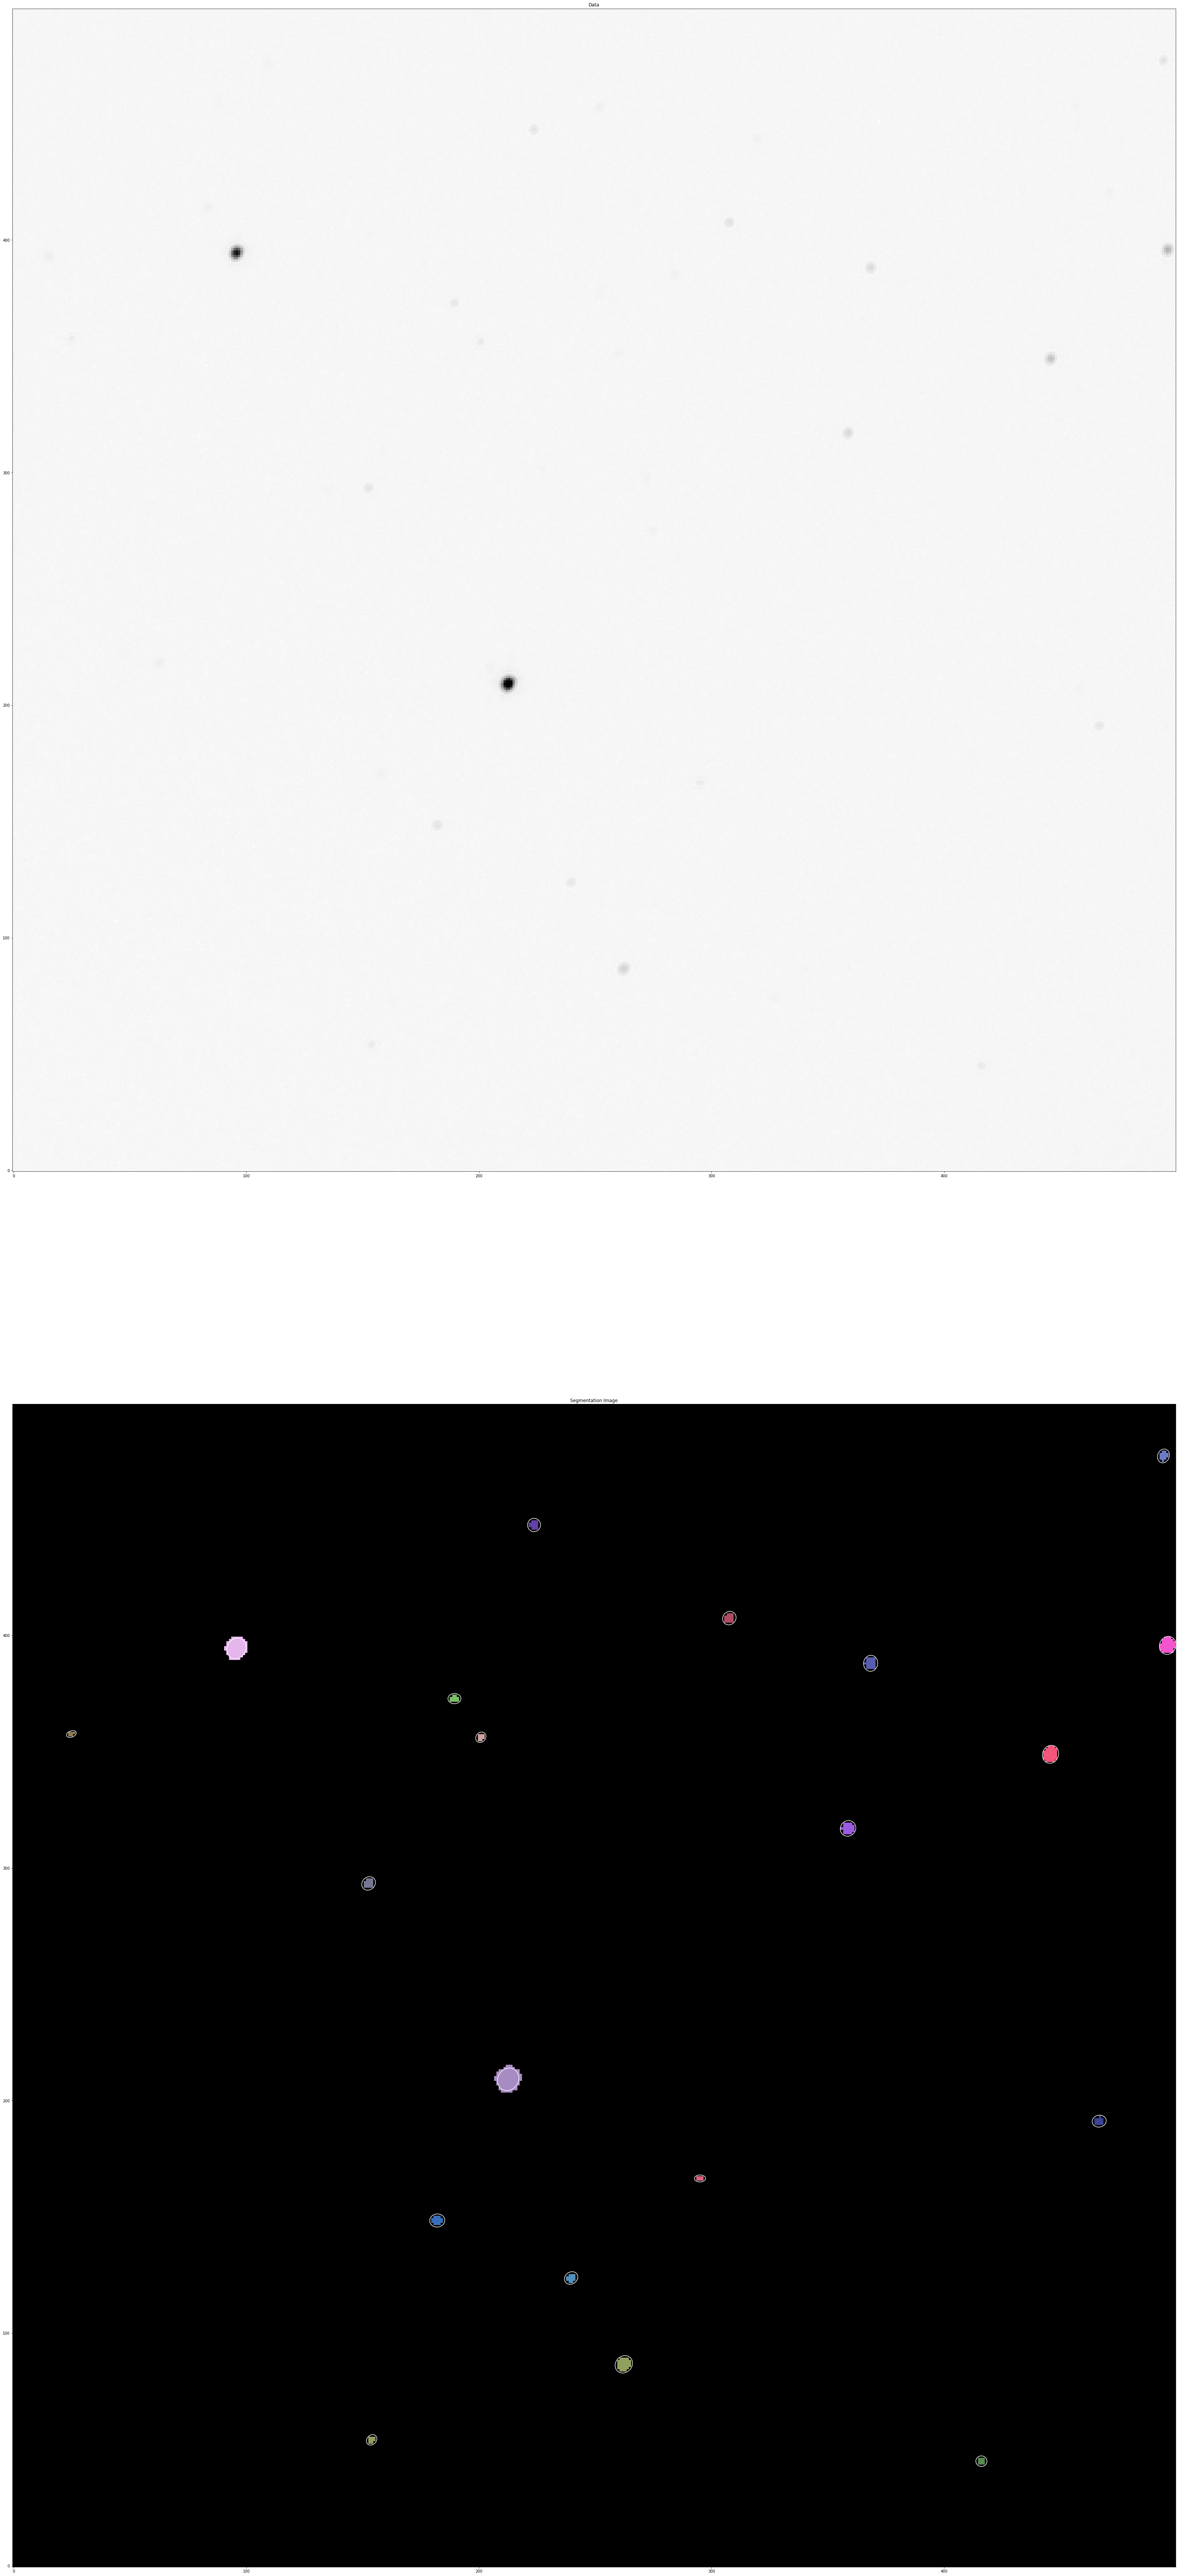

In [18]:
import numpy as np
import astropy.units as u
from photutils import source_properties, EllipticalAperture
cat = source_properties(data, segm)
r = 3.  # approximate isophotal extent
apertures = []
for obj in cat:
    position = np.transpose((obj.xcentroid.value, obj.ycentroid.value))
    a = obj.semimajor_axis_sigma.value * r
    b = obj.semiminor_axis_sigma.value * r
    theta = obj.orientation.to(u.rad).value
    apertures.append(EllipticalAperture(position, a, b, theta=theta))

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(100, 125))
ax1.imshow(data, origin='lower', cmap='Greys', norm=norm)
ax1.set_title('Data')
cmap = segm.make_cmap(random_state=12345)
ax2.imshow(segm, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')
for aperture in apertures:
    aperture.plot(axes=ax1, color='white', lw=1.5)
    aperture.plot(axes=ax2, color='white', lw=1.5)